## Packages

In [2]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from datetime import datetime



#### Built-in Functions

In [3]:
# Function to convert a date to a timestamp 
def date_to_timestamp(date_string):
    date_format = "%Y-%m-%d %H:%M:%S"
    timestamp = datetime.strptime(date_string, date_format).timestamp()
    return timestamp

In [4]:
# Function to check if a day is a weekend
def check_is_weekend(input):
          # format
          format = '%Y-%m-%d'
          # convert from string format to datetime format
          dt = datetime.strptime(input, format).weekday()
          return int(dt>=5)

## Data Pre-processing



In [5]:
# Functions for preprocessing the raw data, the steps are :
# Event aggregation
# Sorting by time
def data_preprocessing(data1,data2):
          # Loading files
          device_df=pd.read_csv(data1)
          logon_df=pd.read_csv(data2)
          
          # Show DataFrames
          print("First rows of ",data1," DataFrame : ","\n",device_df.head(),"\n")
          print("First rows of ",data1," DataFrames : ","\n",logon_df.head(),"\n")

          # Show shape
          print("Shape of ",data1," : ",device_df.shape,"\n") 
          print("Shape of ",data2," : ",logon_df.shape,"\n") 
          
          # Event aggregation
          merged_df=pd.concat([device_df,logon_df])

          # Showing merged DataFrame
          print("First rows of merged DataFrames : ","\n",merged_df.head(),"\n")

          # Replacing the date column with different format
          merged_df['date']=pd.to_datetime(merged_df['date'],dayfirst=False)

          # Sorting by date
          sorted_df=merged_df.sort_values(by=['date'])
          print(" First rows of merged Dataframes sorted by date : ","\n",sorted_df.head(),"\n")
          
          return sorted_df

## Feature Engineering

In [6]:
# Function that will take all data for a user and create a DataFrame
# of 11 columns which are the 11 features and each row is the feature vector of the user for a day
def raw_data_to_Table_of_Feature_Vectors(data):
          
          
          # DataFrame Feature Vector
          df_vector_feature=pd.DataFrame([],columns=['date','nb_logon','nb_logoff','nb_conx','nb_dconx',
                                         'nb_sec_conx','nb_diff_pc','nb_conx_after_hour','nb_events','is_weekend','day_of_month','num_month'])
          
          
          # Iteration Day initialized
          day_connection=str(data.iloc[0]["date"]).split(" ")[0]
          id_for_day_pc=data.iloc[0]["id"]
          day_timestamp_connection=date_to_timestamp(str(data.iloc[0]["date"]))
          
          # Initialisation of variables of DataFrame Feature Vector
          nb_logon=0
          nb_logoff=0
          nb_conx=0
          nb_dconx=0
          nb_sec_conx=0
          nb_diff_pc=0
          nb_conx_after_hour=0
          nb_events=0
          is_weekend=0
          day_of_month=0
          num_month=0
          
          
          
          
          # For the DataFrame
          i=0
          for row in data.itertuples():
                    
                    # is_weekend
                    is_weekend=check_is_weekend(day_connection)
                    # day_of_month
                    day_of_month=day_connection.split("-")[2]
                    # num_month
                    num_month=day_connection.split("-")[1]
   
                    # Feature Calculation : if we are in the same day
                    
                    # nb_diff_pc
                    if (row.id==id_for_day_pc and str(row.date).split(" ")[0]==day_connection):
                              day_pc=[row.pc]
                    if (row.id!=id_for_day_pc and str(row.date).split(" ")[0]==day_connection):
                              
                              if (row.pc not in day_pc):
                                        day_pc.append(row.pc)
                                        nb_diff_pc=len(day_pc)
                              else : 
                                        nb_diff_pc=len(day_pc)
                    # nb_logon
                    if (row.activity=="Logon" and str(row.date).split(" ")[0]==day_connection):
                              nb_logon+=1
                              
                    # nb_logoff and nb_sec_conx
                    if (row.activity=="Logoff" and str(row.date).split(" ")[0]==day_connection):
                              nb_logoff+=1
                              nb_sec_conx=date_to_timestamp(str(row.date))-day_timestamp_connection
                    # nb_conx        
                    if (row.activity=="Connect" and str(row.date).split(" ")[0]==day_connection):
                              nb_conx+=1
                    # nb_dconx        
                    if (row.activity=="Disconnect" and str(row.date).split(" ")[0]==day_connection):
                              nb_dconx+=1
                    # nb_conx_after_hour  
                    if (str(row.date).split(" ")[1]<"08:00:00" and str(row.date).split(" ")[0]==day_connection):
                              nb_conx_after_hour+=1   
                    if (str(row.date).split(" ")[1]>"18:00:00" and str(row.date).split(" ")[0]==day_connection):
                              nb_conx_after_hour+=1
                              
                    # nb_events
                    nb_events= nb_logon + nb_logoff + nb_conx + nb_conx
                    
                    df_vector_feature.loc[i]=[day_connection,nb_logon,nb_logoff,nb_conx,nb_conx,
                                              nb_sec_conx,nb_diff_pc,nb_conx_after_hour,nb_events,is_weekend,day_of_month,num_month]
                              
                    # if we are in a new day     
                    if (str(row.date).split(" ")[0]!=day_connection) :
                              
                              
                              # Reinitialisation
                              nb_logon=0
                              nb_logoff=0
                              nb_conx=0
                              nb_dconx=0
                              nb_sec_conx=0
                              nb_diff_pc=0
                              nb_conx_after_hour=0
                              nb_events=0
                              is_weekend=0
                              day_of_month=0
                              num_month=0
                              i=i+1
                              
                              day_connection=str(str(row.date)).split(" ")[0]
                              day_timestamp_connection=date_to_timestamp(str(row.date))
                              id_for_day_pc=row.id
                              
                              
                              
                              # is_weekend
                              is_weekend=check_is_weekend(day_connection)
                              # day_of_month
                              day_of_month=day_connection.split("-")[2]
                              # num_month
                              num_month=day_connection.split("-")[1]
                              
                              if (row.id==id_for_day_pc and str(row.date).split(" ")[0]==day_connection):
                                        day_pc=[row.pc]

                              if (row.id!=id_for_day_pc and str(row.date).split(" ")[0]==day_connection):

                                        if (row.pc not in day_pc):
                                                  day_pc.append(row.pc)
                                                  nb_diff_pc=len(day_pc)
                                        else : 
                                                  nb_diff_pc=len(day_pc)

                              if (row.activity=="Logon" and str(row.date).split(" ")[0]==day_connection):
                                        nb_logon+=1
                              if (row.activity=="Logoff" and str(row.date).split(" ")[0]==day_connection):
                                        nb_logoff+=1
                                        nb_sec_conx=row.timestamp-day_timestamp_connection
                              if (row.activity=="Connect" and str(row.date).split(" ")[0]==day_connection):
                                        nb_conx+=1
                              if (row.activity=="Disconnect" and str(row.date).split(" ")[0]==day_connection):
                                        nb_dconx+=1
                              if (str(row.date).split(" ")[1]<"08:00:00" and str(row.date).split(" ")[0]==day_connection):
                                        nb_conx_after_hour+=1
                              if (str(row.date).split(" ")[1]>"18:00:00" and str(row.date).split(" ")[0]==day_connection):
                                        nb_conx_after_hour+=1
                                        
                              df_vector_feature.loc[i]=[day_connection,nb_logon,nb_logoff,nb_conx,nb_conx,
                                              nb_sec_conx,nb_diff_pc,nb_conx_after_hour,nb_events,is_weekend,day_of_month,num_month]
                              
          return df_vector_feature                    

In [7]:
def prepare_data_for_a_user(user,user_abnormal_events,sorted_df):
          
          # For User = user
          user_1=sorted_df[sorted_df['user']==user]
          # Show
          print("First rows of ",user," events : ","\n",user_1.head(),"\n")
          print('Shape : ',user_1.shape,"\n")
          
          
          
          # Importing the abnormal events 
          events_user_1_abnormal=pd.read_csv(user_abnormal_events,header=None)
          
          
          # We keep only normal events 
          # The id of abnormal events in a list 
          id_abnormal=events_user_1_abnormal[1]
          # We drop the corresponding abnormal events
          user_1_normal=user_1 
          for id in id_abnormal:
                    user_1_normal=user_1_normal[~(user_1_normal['id']==id)]
          # Show
          print("First rows of ",user," normal events : ","\n",user_1_normal.head(),"\n")
          print('shape : ',user_1_normal.shape)



          # We take only the abnormal events
          user_1_abnormal=pd.DataFrame([],columns=['id','date','user','pc','activity'])
          for id in id_abnormal:
                    user_1_abnormal=pd.concat([user_1_abnormal,user_1[(user_1['id']==id)]])   
          user_1_abnormal
          print("First rows of ",user," abnormal events : ","\n",user_1_abnormal.head(),"\n")
          print('Shape : ',user_1_abnormal.shape)
          
          
          # Creating the DataFrame of vector feature of all events
          table_feature_vector_user_1=raw_data_to_Table_of_Feature_Vectors(user_1)
          print("First rows of ",user," Table of Feature Vectors with Days including normal and abnormal events : ","\n",table_feature_vector_user_1,"\n")
          print("Shape : ",table_feature_vector_user_1.shape)
          

          # Creating the DataFrame of vector feature for the abnormal events
          table_feature_vector_user_1_abnormal=raw_data_to_Table_of_Feature_Vectors(user_1_abnormal)
          # We will remove the days with abnormal events and keep only days with normal events in table_feature_vector_user_1_normal
          # and we will keep all events (normal and abnormal) in table_feature_vector_user_1
          abnormal_day=table_feature_vector_user_1_abnormal['date']
          print("Days that have abnormal events : ",'\n',abnormal_day,"\n")

          # We will create a table with only days with normal events
          table_feature_vector_user_1_normal=table_feature_vector_user_1
          for day in abnormal_day:
                    table_feature_vector_user_1_normal=table_feature_vector_user_1_normal[~(table_feature_vector_user_1_normal['date']==day)]
          print("First rows of ",user," Table of Feature Vectors with Days including only normal events : ","\n",table_feature_vector_user_1_normal,"\n")
          print("Shape : ",table_feature_vector_user_1_normal.shape)
          

          # Creating a vector insiderthreat(like y in tutoriels) with (1/0) where the day is abnormal/normal  if in this day have abnormal events 
          date_for_insiderthreat=table_feature_vector_user_1['date']
          date_for_insiderthreat.tolist()
          insiderthreat = date_for_insiderthreat.isin(abnormal_day)*1
          insiderthreat=insiderthreat.tolist()
          print("insiderthreat vector is the true output(y), the days where there was abnormal events : ","\n",insiderthreat)
          
          
          
          
          # We drop the date columns for model training purpuse
          table_feature_vector_user_1_normal=table_feature_vector_user_1_normal.drop(['date'],axis=1)
          table_feature_vector_user_1=table_feature_vector_user_1.drop(['date'],axis=1)


          return table_feature_vector_user_1, table_feature_vector_user_1_normal, insiderthreat

## Data normalization

In [8]:
def normalization_and_split_Autoencoder(X,X_normal,y):
          
          # Now we will take all events of the user (normal and abnormal) normalize the data et split it to
          # training and testing
          
          # Min-Max Scaling :
          from sklearn.preprocessing import MinMaxScaler, StandardScaler


          # Create an instance of MinMaxScaler
          minmax_scaler = MinMaxScaler()
          # Normalize the dataframe using Min-Max scaling for table_feature_vector_user_1_normal
          normalized_normal = minmax_scaler.fit_transform(X_normal)
          # Normalize the dataframe using Min-Max scaling for table_feature_vector_user_1
          normalized = minmax_scaler.fit_transform(X)



          # Train test split
          from sklearn.model_selection import train_test_split
          X_train_normal, X_test_normal= train_test_split(normalized_normal, test_size=0.4, random_state=42)
          X_validation_normal, X_test_normal= train_test_split(X_test_normal, test_size=0.5, random_state=42)
          
          print('X_train_normal shape : ',X_train_normal.shape)
          print('X_validation_normal shape : ',X_validation_normal.shape,"\n")
          print('X_test_normal shape : ',X_test_normal.shape,"\n")

          X_train, X_test,insiderthreat_train, insiderthreat_test = train_test_split(normalized,y,test_size=0.4, random_state=42)
          X_validation, X_test,insiderthreat_validation, insiderthreat_test= train_test_split(X_test,insiderthreat_test, test_size=0.5, random_state=42)
          print('X_train shape : ',X_train.shape)
          print('X_test shape : ',X_test.shape,"\n")
          print('X_validation shape : ',X_validation.shape,"\n")

          
          print('insiderthreat_train(y_train) lenght : ',len(insiderthreat_train))
          print('insiderthreat_test(y_test) lenght : ',len(insiderthreat_test),'\n')
          print('insiderthreat_validation(y_valid) lenght : ',len(insiderthreat_validation),'\n')
          
          
          # Reshaping for input in the model for X_train , X_validation and X_test
          X_train=X_train.reshape(X_train.shape[0],1,X_train.shape[1])
          print("Shape of X_train",X_train.shape)
          
          X_validation=X_validation.reshape(X_validation.shape[0],1,X_validation.shape[1])
          print("Shape of X_validation",X_validation.shape)

          X_test=X_test.reshape(X_test.shape[0],1,X_test.shape[1])
          print("Shape of X_test",X_test.shape)

          # Reshaping for input in the model for X_train_normal and X_test_normal
          X_train_normal=X_train_normal.reshape(X_train_normal.shape[0],1,X_train_normal.shape[1])
          print("Shape of X_train_normal",X_train_normal.shape)
          
          X_validation_normal=X_validation_normal.reshape(X_validation_normal.shape[0],1,X_validation_normal.shape[1])
          print("Shape of X_validation_normal",X_validation_normal.shape)

          X_test_normal=X_test_normal.reshape(X_test_normal.shape[0],1,X_test_normal.shape[1])
          print("Shape of X_test_normal",X_test_normal.shape,"\n")


          return X_train_normal,X_validation_normal, X_test_normal,X_train,X_validation, X_test,insiderthreat_train,insiderthreat_validation, insiderthreat_test

In [9]:
def normalization_and_split_iForest(X,X_normal,y):
          
          # Now we will take all events of the user (normal and abnormal) normalize the data et split it to
          # training and testing
          
          # Min-Max Scaling :
          from sklearn.preprocessing import  StandardScaler


          # Create an instance of MinMaxScaler
          standscaler = StandardScaler()

          # Normalize the dataframe using Min-Max scaling for table_feature_vector_user_1
          normalized = standscaler.fit_transform(X)



          # Train test split
          from sklearn.model_selection import train_test_split
          

          X_train, X_test,insiderthreat_train, insiderthreat_test = train_test_split(normalized,y,test_size=0.4, random_state=42)

          print('X_train shape : ',X_train.shape)
          print('X_test shape : ',X_test.shape,"\n")


          
          print('insiderthreat_train(y_train) lenght : ',len(insiderthreat_train))
          print('insiderthreat_test(y_test) lenght : ',len(insiderthreat_test),'\n')


          return X_train, X_test,insiderthreat_train, insiderthreat_test

## Building the model

In [10]:
def build_training_model_Autoencoder(X_train_normal, X_validation): 

          from keras.models import Sequential
          from keras.layers import LSTM
          from keras.layers import Dense
          from keras.layers import RepeatVector
          from keras.layers import TimeDistributed
          from keras import optimizers

          
          # Parametres
          timesteps=1
          n_features=X_train_normal.shape[2]
          lr = 0.000001

          # define model
          model = Sequential()
          model.add(LSTM(8, activation='relu', input_shape=(timesteps,n_features), return_sequences=True))
          model.add(LSTM(6, activation='relu', input_shape=(timesteps,n_features), return_sequences=True))
          model.add(LSTM(4, activation='relu', return_sequences=False))
          model.add(RepeatVector(timesteps))
          model.add(LSTM(4, activation='relu', return_sequences=True))
          model.add(LSTM(6, activation='relu', return_sequences=True))
          model.add(LSTM(8, activation='relu', return_sequences=True))
          model.add(TimeDistributed(Dense(n_features)))
          adam = optimizers.Adam(lr)
          model.compile(optimizer='adam', loss='mse')
          model.summary()


          # We will train the model on normal days and test on X_test_normal
          model_history = model.fit(X_train_normal, X_train_normal, 
                                                  epochs=10, 
                                                  validation_data=(X_validation, X_validation),
                                                  verbose=1).history
          
          # Ploting the validation loss of train et test data 
          import matplotlib.pyplot as plt
          plt.plot(model_history['loss'], linewidth=2, label='Training')
          plt.plot(model_history['val_loss'], linewidth=3, label='Validation')
          plt.title('Model Loss')
          plt.legend()
          
          return model

In [11]:
def build_training_model_iForest(X,n_estimators,contamination):
          from sklearn.ensemble import IsolationForest
          iforest = IsolationForest(n_estimators = n_estimators, contamination = contamination)
          return iforest
          

## Reconstruction error and metrics of evaluation

In [12]:
def reconstruction_error_and_metrics_Autoencoder(model,X_test,insiderthreat_test):    
         
          from sklearn import metrics
          from sklearn.metrics import roc_auc_score, roc_curve
          import matplotlib.pyplot as plt
          from sklearn.metrics import accuracy_score

          
          
          print("Number of insiderthreat  : ",sum(insiderthreat_test))
          print("Number of days in sample : ",X_test.shape[0])
          

          reconstructed_samples=model.predict(X_test)
          # Calculate the reconstruction error (MSE) for each input sample
          reconstruction_errors = np.mean(np.square(X_test - reconstructed_samples), axis=(1, 2))


          # Calculating the threshold
          threshold=np.mean(reconstruction_errors)+np.std(reconstruction_errors)


          # Prediction probabilities
          r_probs = [0 for _ in range(len(insiderthreat_test))]

                    # Predicting labels (beacause we does not have predict_proba() function and we want only reconstruction error)
                    # So for the reconstruction error of a day (Feature vector) if it is bigger than the threshould than it is a abnormal day
          predicted_labels = np.where(reconstruction_errors < threshold, 0, 1)
          model_probs=predicted_labels

          accuracy = accuracy_score(insiderthreat_test, predicted_labels)

          print("Accuracy:", accuracy)


          # Calculate AUROC
          model_auc=roc_auc_score(insiderthreat_test,model_probs)
          
          # ROC curve
          model_fpr,model_tpr,_=roc_curve(insiderthreat_test,model_probs)
          ns_fpr, ns_tpr, _ = roc_curve(insiderthreat_test, r_probs)
          
          # Plot ROC curve
          print("Plot of ROC curve : ")
          plt.plot(model_fpr,model_tpr,linestyle='-',label='Model LSTM Autoencoder (AUC = %0.3f)'% model_auc)
          plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')

          # Title
          plt.title('ROC curve')
          # Axis labels
          plt.xlabel('False Positive Rate')
          plt.ylabel('True Positive Rate')
          # Show legend
          plt.legend()
          plt.show()
          print("\n")




          import seaborn as sns
          import matplotlib.pyplot as plt
          from sklearn.metrics import confusion_matrix

          # Calculate confusion matrix
          cm = confusion_matrix(insiderthreat_test, predicted_labels)

          # Create a heatmap for the confusion matrix
          plt.figure(figsize=(10,8))
          sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

          # Set labels, title, and ticks
          print("Plot of confusion matrix : ")
          plt.xlabel('Predicted Labels')
          plt.ylabel('True Labels')
          plt.title('Confusion Matrix')
          plt.xticks(ticks=[0, 1], labels=['Class Normal Day', 'Abnormal Day'])
          plt.yticks(ticks=[0, 1], labels=['Class Normal Day', 'Abnormal Day'])
          
          # Display the plot
          plt.show()

In [13]:
def reconstruction_error_and_metrics_iForest(model,X_test,insiderthreat_test):    
         
          from sklearn import metrics
          from sklearn.metrics import roc_auc_score, roc_curve
          import matplotlib.pyplot as plt
          
          
          print("Number of insiderthreat  : ",sum(insiderthreat_test))
          print("Number of days in sample : ",X_test.shape[0])
          

          predicted_labels=model.fit_predict(X_test)

          # Prediction probabilities
          r_probs = [0 for _ in range(len(insiderthreat_test))]

          model_probs=predicted_labels

          from sklearn.metrics import accuracy_score

          accuracy = accuracy_score(insiderthreat_test, predicted_labels)

          print("Accuracy:", accuracy)


          # Calculate AUROC
          model_auc=roc_auc_score(insiderthreat_test,model_probs)
          
          # ROC curve
          model_fpr,model_tpr,_=roc_curve(insiderthreat_test,model_probs)
          ns_fpr, ns_tpr, _ = roc_curve(insiderthreat_test, r_probs)
          
          # Plot ROC curve
          print("Plot of ROC curve : ")
          plt.plot(model_fpr,model_tpr,linestyle='-',label='Model LSTM Autoencoder (AUC = %0.3f)'% model_auc)
          plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')

          # Title
          plt.title('ROC curve')
          # Axis labels
          plt.xlabel('False Positive Rate')
          plt.ylabel('True Positive Rate')
          # Show legend
          plt.legend()
          plt.show()
          print("\n")




          import seaborn as sns
          import matplotlib.pyplot as plt
          from sklearn.metrics import confusion_matrix

          # Calculate confusion matrix
          cm = confusion_matrix(insiderthreat_test, predicted_labels)

          # Create a heatmap for the confusion matrix
          plt.figure(figsize=(10,8))
          sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

          # Set labels, title, and ticks
          print("Plot of confusion matrix : ")
          plt.xlabel('Predicted Labels')
          plt.ylabel('True Labels')
          plt.title('Confusion Matrix')
          plt.xticks(ticks=[0, 1], labels=['Class Normal Day', 'Abnormal Day'])
          plt.yticks(ticks=[0, 1], labels=['Class Normal Day', 'Abnormal Day'])
          
          # Display the plot
          plt.show()

# Use case for user MOS0047

First rows of  device.csv  DataFrame :  
                          id                 date     user       pc    activity
0  {J1S3-L9UU75BQ-7790ATPL}  01/02/2010 07:21:06  MOH0273  PC-6699     Connect
1  {N7B5-Y7BB27SI-2946PUJK}  01/02/2010 07:37:41  MOH0273  PC-6699  Disconnect
2  {U1V9-Z7XT67KV-5649MYHI}  01/02/2010 07:59:11  HPH0075  PC-2417     Connect
3  {H0Z7-E6GB57XZ-1603MOXD}  01/02/2010 07:59:49  IIW0249  PC-0843     Connect
4  {L7P2-G4PX02RX-7999GYOY}  01/02/2010 08:04:26  IIW0249  PC-0843  Disconnect 

First rows of  device.csv  DataFrames :  
                          id                 date     user       pc activity
0  {X1D9-S0ES98JV-5357PWMI}  01/02/2010 06:49:00  NGF0157  PC-6056    Logon
1  {G2B3-L6EJ61GT-2222RKSO}  01/02/2010 06:50:00  LRR0148  PC-4275    Logon
2  {U6Q3-U0WE70UA-3770UREL}  01/02/2010 06:53:04  LRR0148  PC-4124    Logon
3  {I0N5-R7NA26TG-6263KNGM}  01/02/2010 07:00:00  IRM0931  PC-7188    Logon
4  {D1S0-N6FH62BT-5398KANK}  01/02/2010 07:00:00  MOH0273  

2023-08-28 13:44:17.167780: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-28 13:44:17.618205: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-28 13:44:17.619930: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-28 13:44:19.342031: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 8)              640       
                                                                 
 lstm_1 (LSTM)               (None, 1, 6)              360       
                                                                 
 lstm_2 (LSTM)               (None, 4)                 176       
                                                                 
 repeat_vector (RepeatVector  (None, 1, 4)             0         
 )                                                               
                                                                 
 lstm_3 (LSTM)               (None, 1, 4)              144       
                                                                 
 lstm_4 (LSTM)               (None, 1, 6)              264       
                                                        

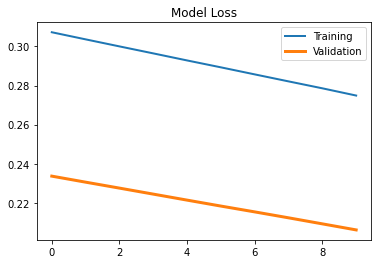

In [14]:
# Autoencoder
sorted_df=data_preprocessing('device.csv','logon.csv')
X,X_normal,y= prepare_data_for_a_user('MOS0047','user_1_abnormal_cleaned.csv',sorted_df)
X_train_normal,X_validation_normal, X_test_normal,X_train,X_validation, X_test,insiderthreat_train,insiderthreat_validation, insiderthreat_test=normalization_and_split_Autoencoder(X,X_normal,y)
model_Autoencoder=build_training_model_Autoencoder(X_train_normal, X_validation)




### On test sample 

Number of insiderthreat  :  2
Number of days in sample :  36
2/2 [==============================] - 1s 3ms/step
Accuracy: 0.8611111111111112
Plot of ROC curve : 


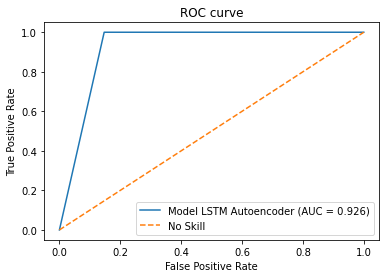



Plot of confusion matrix : 


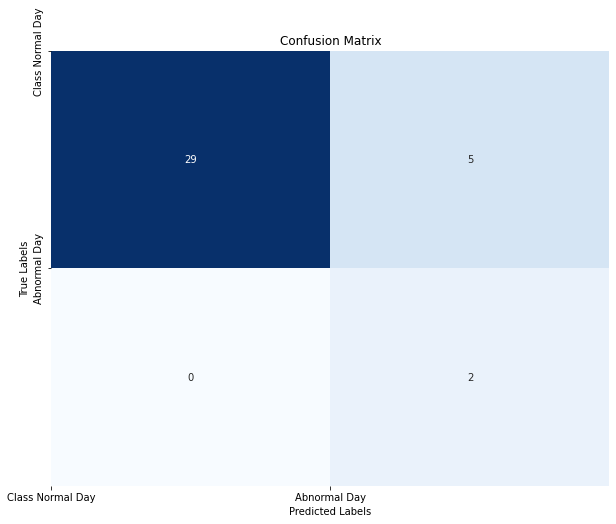

In [15]:
reconstruction_error_and_metrics_Autoencoder(model_Autoencoder,X_test,insiderthreat_test)

# Use case for user RMW0542

First rows of  device.csv  DataFrame :  
                          id                 date     user       pc    activity
0  {J1S3-L9UU75BQ-7790ATPL}  01/02/2010 07:21:06  MOH0273  PC-6699     Connect
1  {N7B5-Y7BB27SI-2946PUJK}  01/02/2010 07:37:41  MOH0273  PC-6699  Disconnect
2  {U1V9-Z7XT67KV-5649MYHI}  01/02/2010 07:59:11  HPH0075  PC-2417     Connect
3  {H0Z7-E6GB57XZ-1603MOXD}  01/02/2010 07:59:49  IIW0249  PC-0843     Connect
4  {L7P2-G4PX02RX-7999GYOY}  01/02/2010 08:04:26  IIW0249  PC-0843  Disconnect 

First rows of  device.csv  DataFrames :  
                          id                 date     user       pc activity
0  {X1D9-S0ES98JV-5357PWMI}  01/02/2010 06:49:00  NGF0157  PC-6056    Logon
1  {G2B3-L6EJ61GT-2222RKSO}  01/02/2010 06:50:00  LRR0148  PC-4275    Logon
2  {U6Q3-U0WE70UA-3770UREL}  01/02/2010 06:53:04  LRR0148  PC-4124    Logon
3  {I0N5-R7NA26TG-6263KNGM}  01/02/2010 07:00:00  IRM0931  PC-7188    Logon
4  {D1S0-N6FH62BT-5398KANK}  01/02/2010 07:00:00  MOH0273  

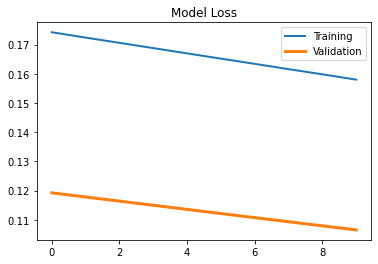

In [16]:
sorted_df=data_preprocessing('device.csv','logon.csv')
X,X_normal,y= prepare_data_for_a_user('RMW0542','user_2_abnormal_cleaned.csv',sorted_df)
X_train_normal,X_validation_normal, X_test_normal,X_train,X_validation, X_test,insiderthreat_train,insiderthreat_validation, insiderthreat_test=normalization_and_split_Autoencoder(X,X_normal,y)
model=build_training_model_Autoencoder(X_train_normal, X_validation)


### On test sample

Number of insiderthreat  :  1
Number of days in sample :  33
2/2 [==============================] - 1s 5ms/step
Accuracy: 0.8484848484848485
Plot of ROC curve : 


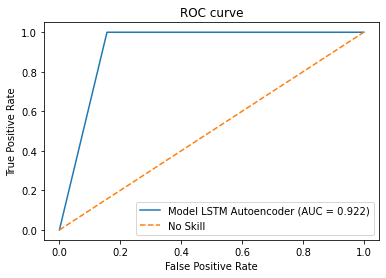



Plot of confusion matrix : 


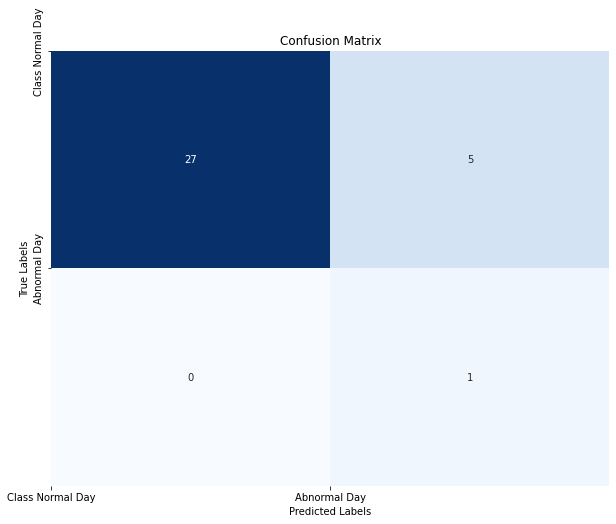

In [17]:
reconstruction_error_and_metrics_Autoencoder(model,X_test,insiderthreat_test)

# Use case for user KRL0501


First rows of  device.csv  DataFrame :  
                          id                 date     user       pc    activity
0  {J1S3-L9UU75BQ-7790ATPL}  01/02/2010 07:21:06  MOH0273  PC-6699     Connect
1  {N7B5-Y7BB27SI-2946PUJK}  01/02/2010 07:37:41  MOH0273  PC-6699  Disconnect
2  {U1V9-Z7XT67KV-5649MYHI}  01/02/2010 07:59:11  HPH0075  PC-2417     Connect
3  {H0Z7-E6GB57XZ-1603MOXD}  01/02/2010 07:59:49  IIW0249  PC-0843     Connect
4  {L7P2-G4PX02RX-7999GYOY}  01/02/2010 08:04:26  IIW0249  PC-0843  Disconnect 

First rows of  device.csv  DataFrames :  
                          id                 date     user       pc activity
0  {X1D9-S0ES98JV-5357PWMI}  01/02/2010 06:49:00  NGF0157  PC-6056    Logon
1  {G2B3-L6EJ61GT-2222RKSO}  01/02/2010 06:50:00  LRR0148  PC-4275    Logon
2  {U6Q3-U0WE70UA-3770UREL}  01/02/2010 06:53:04  LRR0148  PC-4124    Logon
3  {I0N5-R7NA26TG-6263KNGM}  01/02/2010 07:00:00  IRM0931  PC-7188    Logon
4  {D1S0-N6FH62BT-5398KANK}  01/02/2010 07:00:00  MOH0273  

 First rows of merged Dataframes sorted by date :  
                          id                date     user       pc activity
0  {X1D9-S0ES98JV-5357PWMI} 2010-01-02 06:49:00  NGF0157  PC-6056    Logon
1  {G2B3-L6EJ61GT-2222RKSO} 2010-01-02 06:50:00  LRR0148  PC-4275    Logon
2  {U6Q3-U0WE70UA-3770UREL} 2010-01-02 06:53:04  LRR0148  PC-4124    Logon
3  {I0N5-R7NA26TG-6263KNGM} 2010-01-02 07:00:00  IRM0931  PC-7188    Logon
4  {D1S0-N6FH62BT-5398KANK} 2010-01-02 07:00:00  MOH0273  PC-6699    Logon 

First rows of  KRL0501  events :  
                             id                date     user       pc  \
1010  {X2J5-I5SF08RC-1517NBJS} 2010-01-04 08:05:00  KRL0501  PC-7206   
890   {Q5Y2-U3RA13PK-2623RLZB} 2010-01-04 13:10:19  KRL0501  PC-7206   
926   {Y7C6-L2UH54QH-1455YPLI} 2010-01-04 13:27:32  KRL0501  PC-7206   
1207  {X4L6-J3YG51OF-2942FYXY} 2010-01-04 15:26:42  KRL0501  PC-7206   
1326  {U8T1-M5IH27TC-2245AZBI} 2010-01-04 16:27:17  KRL0501  PC-7206   

        activity  
1010   

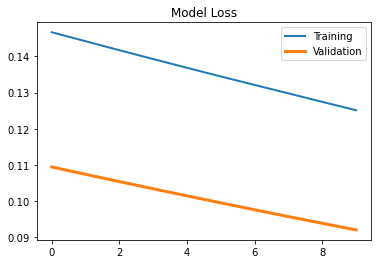

In [18]:
sorted_df=data_preprocessing('device.csv','logon.csv')
X,X_normal,y= prepare_data_for_a_user('KRL0501','user_3_abnormal_cleaned.csv',sorted_df)
X_train_normal,X_validation_normal, X_test_normal,X_train,X_validation, X_test,insiderthreat_train,insiderthreat_validation, insiderthreat_test=normalization_and_split_Autoencoder(X,X_normal,y)
model=build_training_model_Autoencoder(X_train_normal, X_validation)

### On test sample

Number of insiderthreat  :  1
Number of days in sample :  53
2/2 [==============================] - 1s 3ms/step
Accuracy: 0.8867924528301887
Plot of ROC curve : 


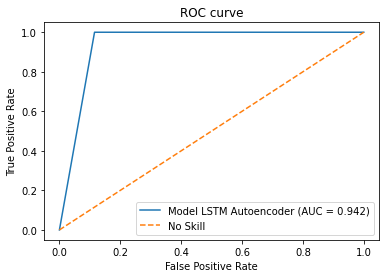



Plot of confusion matrix : 


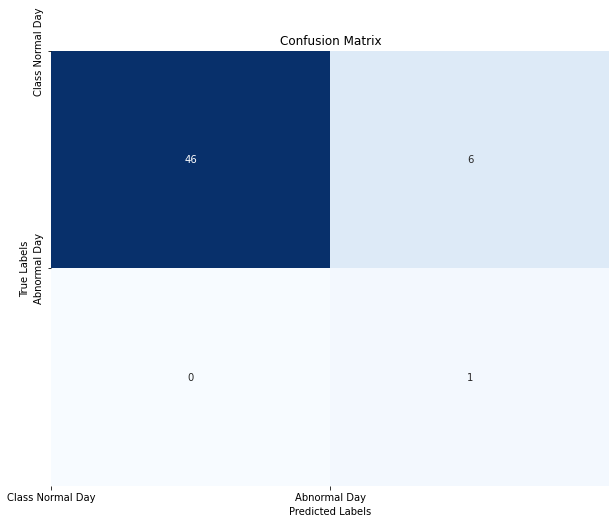

In [19]:
reconstruction_error_and_metrics_Autoencoder(model,X_test,insiderthreat_test)